# Red wine quality prediction

## In this project we will predict whether the wine quality is 'Good' or 'Bad'

Importing all the libraries

In [707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Reading the data set

In [708]:
wine_data=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/PracticeProjets/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [709]:
wine_data.shape

(1599, 12)

We have 1599 rows and 12 columns

In [710]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Our Target variable 'quality' has 6 discrete values.It means we have 6 different quality of wines availabe in the data set.

In [711]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


 1. There are no null values
 2. All the feature variables are having continous data.
 3. Looks like we have outliers in residual sugar,free sulphur dioxide,total sulphur dioxide

In [712]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

It is confirmed that there are no null values in our data set.

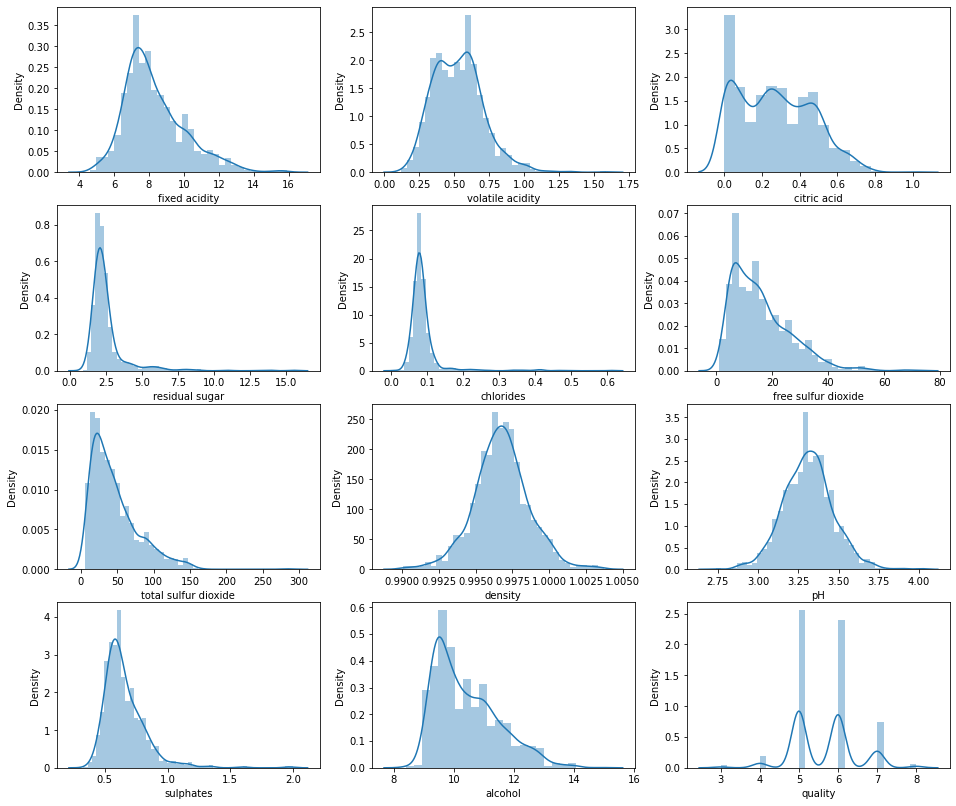

In [713]:
plt.figure(figsize=(16,14))
pltn=1
for col in wine_data.columns:
    ax=plt.subplot(4,3,pltn)
    sns.distplot(wine_data[col])
    pltn+=1
plt.show()

We have skewed data in fixed acidity,volatile acidity,residual sugar,chlorides,free sulphur dioxide,total sulphur diaxide,sulphates,alcohol

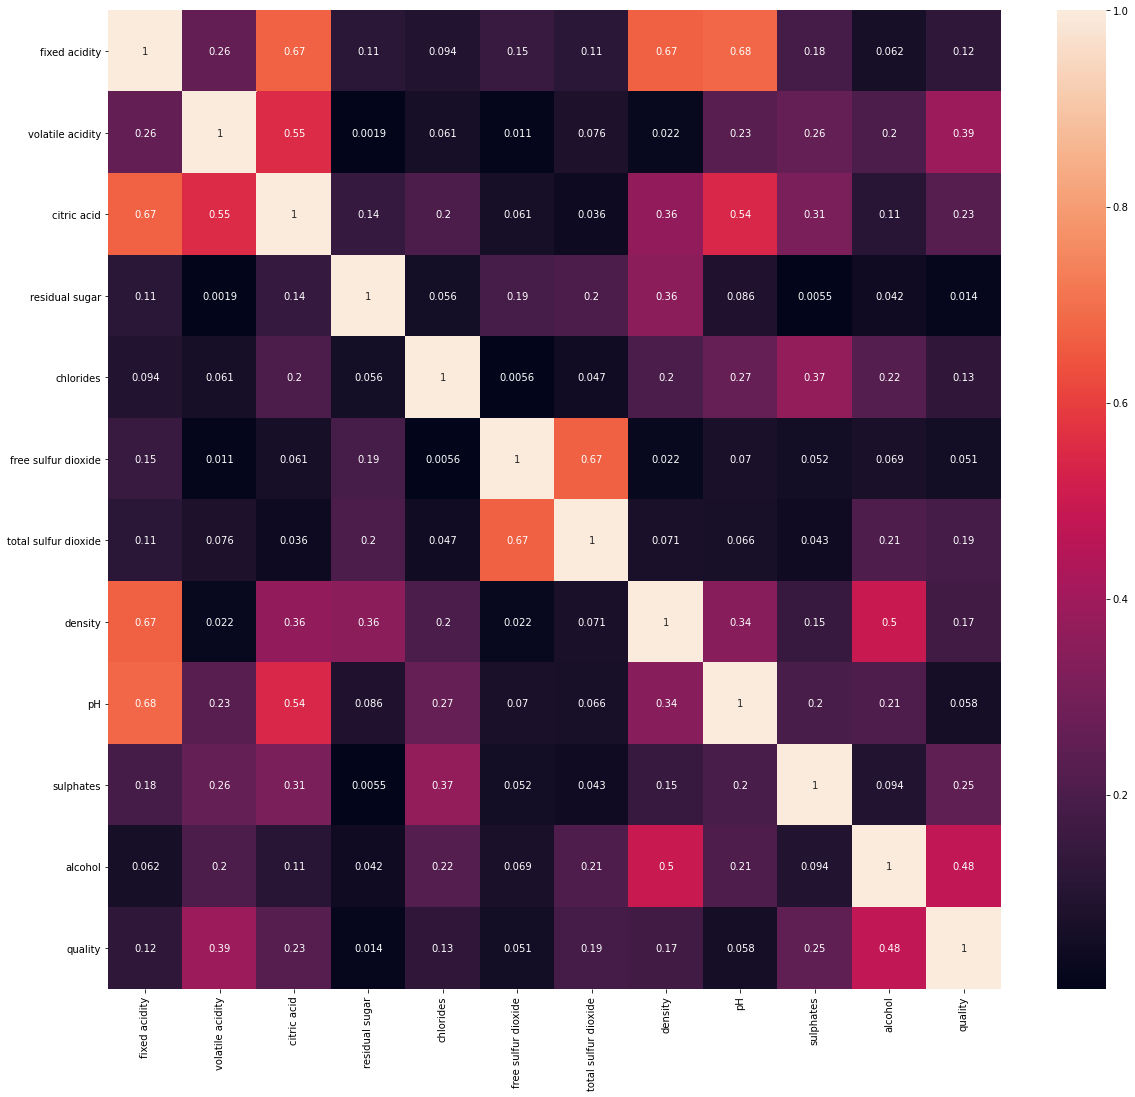

In [714]:
plt.figure(figsize=(20,18))
sns.heatmap(np.abs(wine_data.corr()),annot=True)
plt.show()

 1. From the above heat map, we could not see any strong correlation(>70%) with in any of the features.
 2. Also we can see residual sugar is having very very less correlation with the target varaiable.


In [715]:
wine_data.skew().sort_values()

density                 0.071288
pH                      0.193683
quality                 0.217802
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

Again it is confirmed that we have skewed data in our data set.

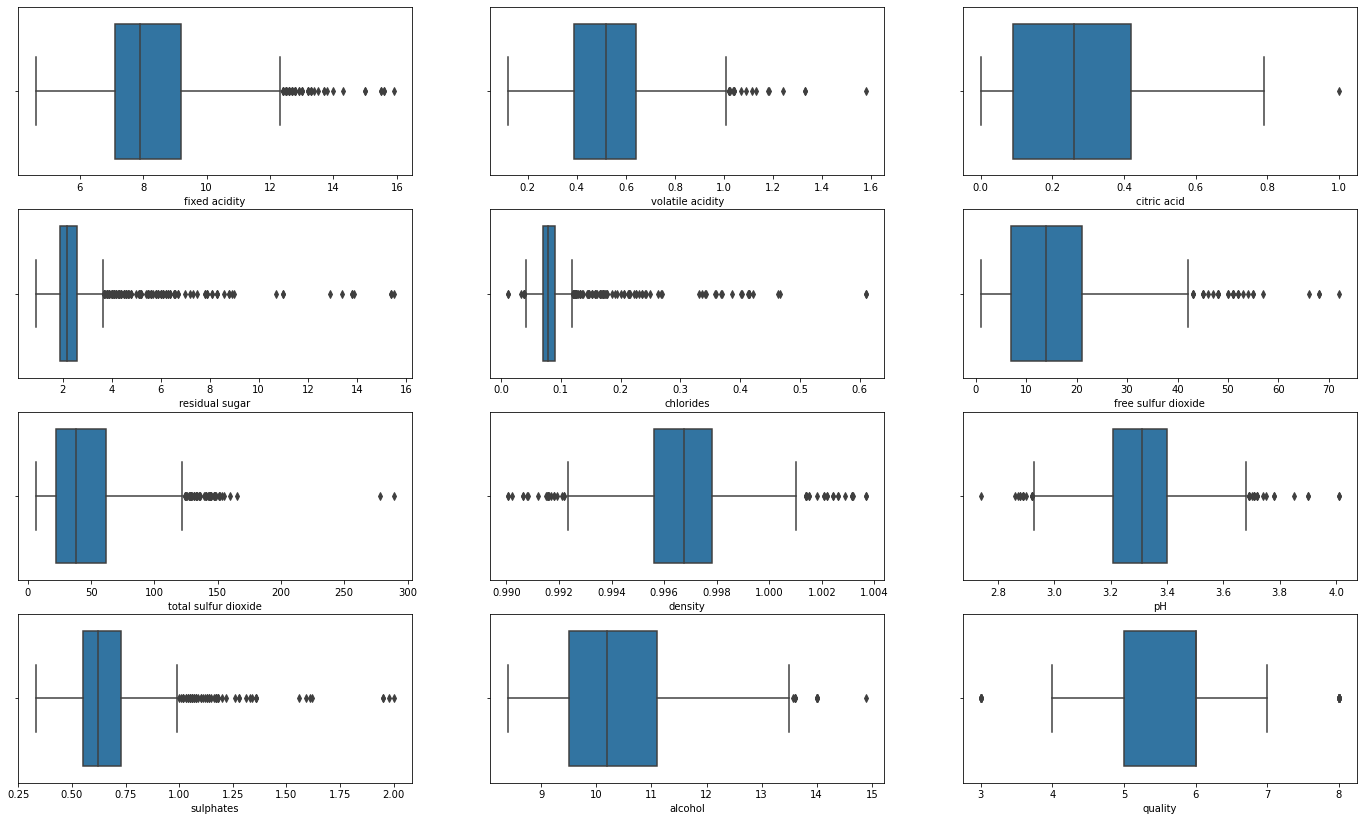

In [716]:
plt.figure(figsize=(24,18))
pltn=1
for col in wine_data.columns:
    ax=plt.subplot(5,3,pltn)
    sns.boxplot(wine_data[col])
    pltn+=1
plt.show()

Box plot also shows that we have outliers in all the fields except citric acid and alcohol.

In [717]:
from scipy.stats import zscore
zscore=zscore(wine_data[['volatile acidity','alcohol','fixed acidity','free sulfur dioxide','total sulfur dioxide','sulphates','chlorides']])
score=np.abs(zscore)
filters=(score<3).all(axis=1)
wine_data=wine_data[filters]
print(wine_data.shape)
wine_data.head()

(1491, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We removed outliers using zscore value and after removing outliers now we have 1491 rows.

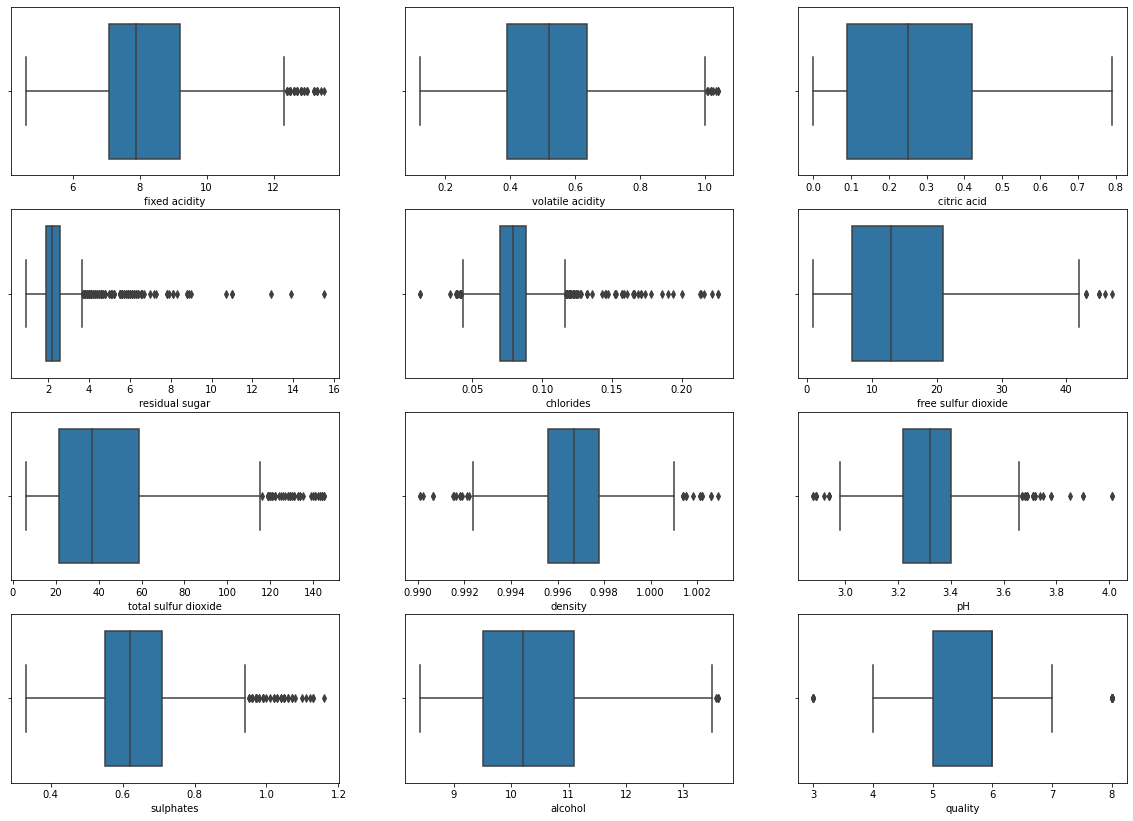

In [718]:
plt.figure(figsize=(20,18))
pltn=1
for col in wine_data.columns:
    ax=plt.subplot(5,3,pltn)
    sns.boxplot(wine_data[col])
    pltn+=1
plt.show()

Even after removing outliers using zscore, still the dataset having few outliers. But if we go ahead with VIF factor, it leads to more data loss(Tried VIF and we are losing around 21% data). As that will not be good idea to loss more data, lets go ahead with current data and build our model. 

In [719]:
wine_data.skew().sort_values()

density                -0.022947
quality                 0.238669
citric acid             0.298116
pH                      0.326986
volatile acidity        0.381043
alcohol                 0.755780
fixed acidity           0.785315
free sulfur dioxide     0.843644
sulphates               0.892224
total sulfur dioxide    1.138927
chlorides               2.170660
residual sugar          4.224090
dtype: float64

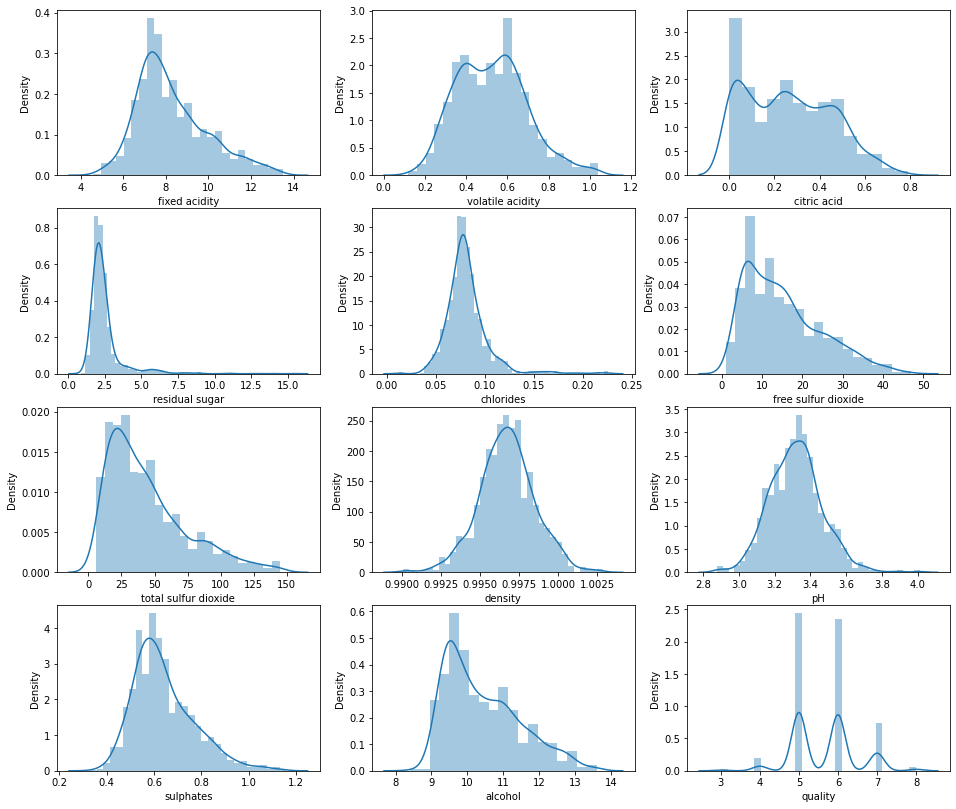

In [720]:
plt.figure(figsize=(16,14))
pltn=1
for col in wine_data.columns:
    ax=plt.subplot(4,3,pltn)
    sns.distplot(wine_data[col])
    pltn+=1
plt.show()

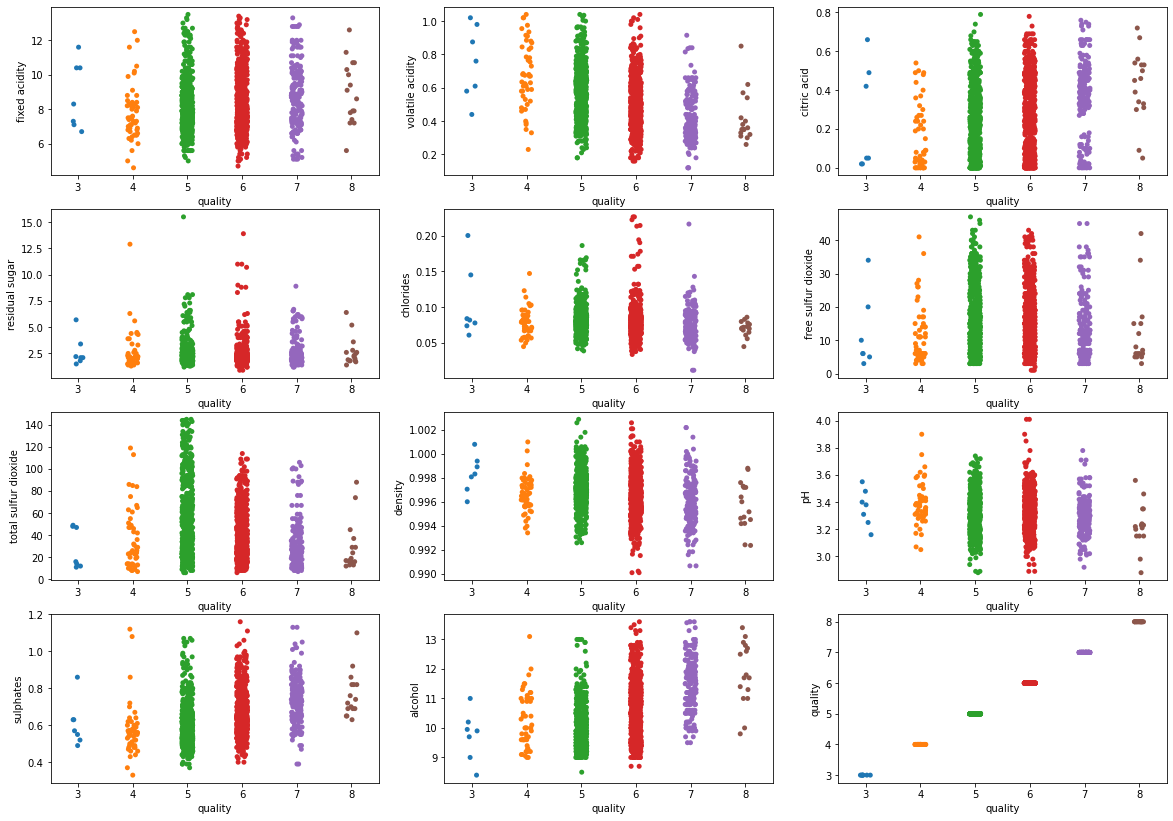

In [721]:
plt.figure(figsize=(20,18))
pltno=1
for col in wine_data.columns:
    ax=plt.subplot(5,3,pltno)
    pltno+=1
    sns.stripplot(x=wine_data['quality'],y=wine_data[col])
    plt.xlabel('quality')
    plt.ylabel(col)
plt.show()

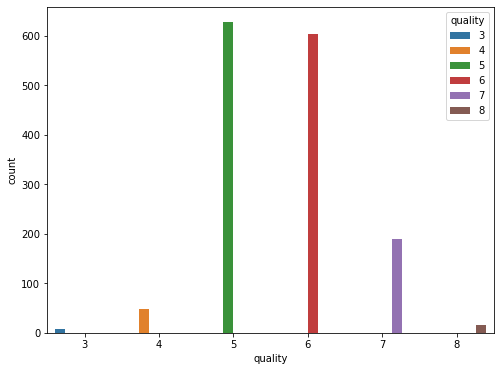

In [722]:
plt.figure(figsize=(8,6))
sns.countplot(x=wine_data['quality'],data=wine_data,hue=wine_data['quality'])
plt.show()

Observations:
 1. We have imbalanced data.
 2. more data available in normal(which not too good and not too bad) quality.
 

Since we have imbalanced data we will group the classes into two groups wither 'Good' or 'Bad' quality.
the quality is greater than 6.5 will be considered as good and quality and rest are will be considered as bad quality.

In [723]:
bin_range= (2,6.5,8)
labels =['bad','good']
wine_data['quality'] = pd.cut(wine_data['quality'],bins=bin_range,labels=labels)


bad     1286
good     205
Name: quality, dtype: int64


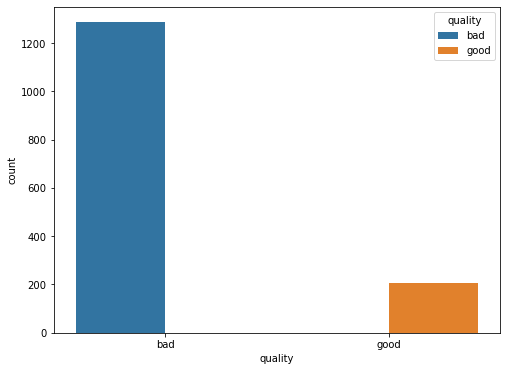

In [724]:
print(wine_data['quality'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x=wine_data['quality'],data=wine_data,hue=wine_data['quality'])
plt.show()

We have more bad quality wine than good quality wine.

In [725]:
from sklearn.preprocessing import LabelEncoder
lbl_enc=LabelEncoder()
wine_data['quality']=lbl_enc.fit_transform(wine_data['quality'])
wine_data['quality'].value_counts()

0    1286
1     205
Name: quality, dtype: int64

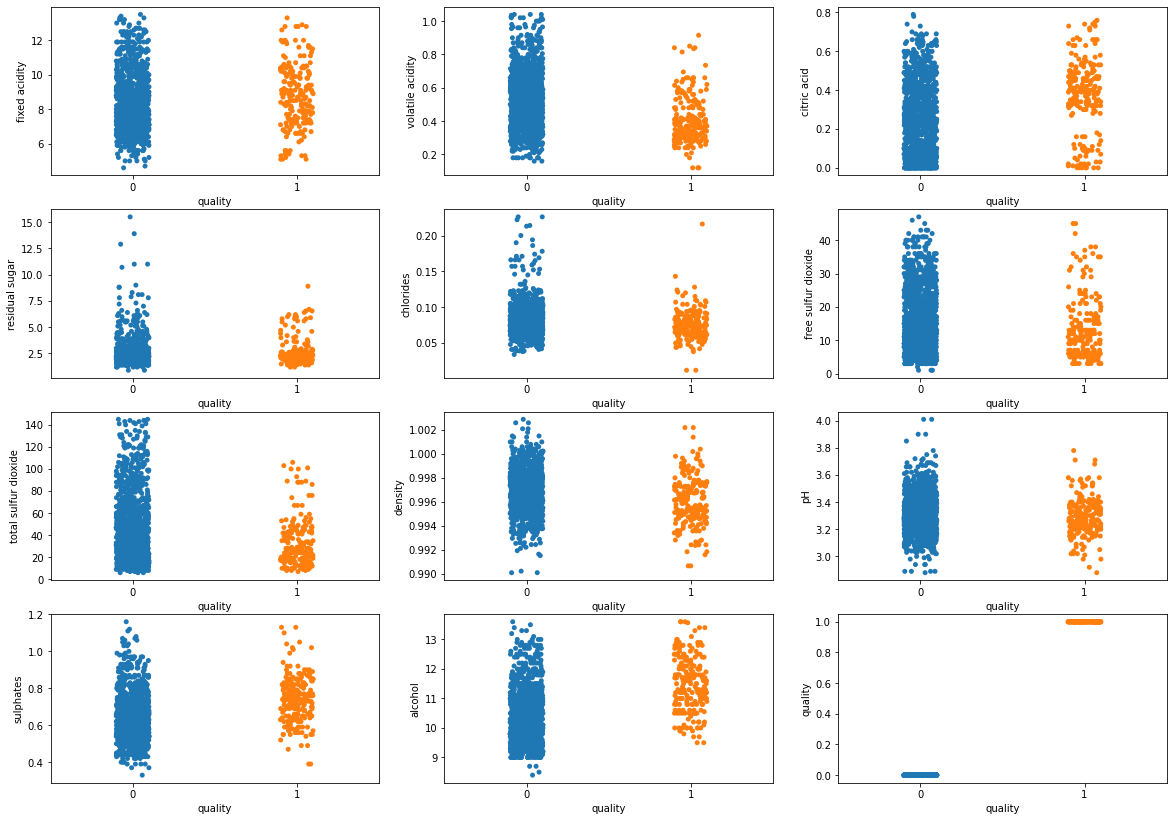

In [726]:
plt.figure(figsize=(20,18))
pltno=1
for col in wine_data.columns:
    ax=plt.subplot(5,3,pltno)
    pltno+=1
    sns.stripplot(x=wine_data['quality'],y=wine_data[col])
    plt.xlabel('quality')
    plt.ylabel(col)
plt.show()

Observations:
 1. When the volatile acidity and total suplhur dioxide levels are more,the queality of the wine is bad.
 2. when the chlorides level is more, the quality of the wine is bad
 3. When the density is less the quality is high.
 4. When the sulphates and alcohol leves are more, the quality of the wine is good.
 

In [727]:
y=wine_data['quality']
X=wine_data.drop(['quality'],axis=1)

scaling the input data using standard scalar

In [728]:
X_sc=StandardScaler().fit_transform(X)

Importing all the classifier models

In [729]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Finding best random state

In [730]:
max_accuracy=0
best_RS=0
for i in range(1,300):
    log_reg=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.20,random_state=i)
    log_reg.fit(X_train,y_train)
    y_pred=log_reg.predict(X_test)
    accuracy=r2_score(y_test,y_pred)
    if(accuracy>max_accuracy):
        max_accuracy=accuracy
        best_RS=i
print("Max accuracy: ",max_accuracy,'with best Random state: ',best_RS)

Max accuracy:  0.27646702964307324 with best Random state:  124


spliting the datset as train and test set using the above random state

In [731]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=124)

In [732]:
print('Training set size before applying SMOTE')
print(X_train.shape)
print(y_train.shape)

Training set size before applying SMOTE
(1118, 11)
(1118,)


As we have imbalanced data set, we will use SMOTE technique to balance our training set

In [733]:
from imblearn.over_sampling import SMOTE
X_train,y_train=SMOTE(k_neighbors=3).fit_resample(X_train,y_train)

In [734]:
print('Training set size after applying SMOTE')
print(X_train.shape)
print(y_train.shape)

Training set size after applying SMOTE
(1938, 11)
(1938,)


Now our training dats should have the balanced classes.

## Model selection

In [735]:
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()
dt_clf=DecisionTreeClassifier()
knn_clf=KNeighborsClassifier()

model=(log_reg,rf_clf,dt_clf,knn_clf)
for m in model:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    print(m,' Metrics')
    print('====================================')
    print("Accuracy score: ",accuracy_score(y_test,y_pred),'\n')
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred),'\n')
    print("Classification report: \n",classification_report(y_test,y_pred),'\n\n')

LogisticRegression()  Metrics
Accuracy score:  0.8150134048257373 

Confusion Matrix: 
 [[252  65]
 [  4  52]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.79      0.88       317
           1       0.44      0.93      0.60        56

    accuracy                           0.82       373
   macro avg       0.71      0.86      0.74       373
weighted avg       0.90      0.82      0.84       373
 


RandomForestClassifier()  Metrics
Accuracy score:  0.9142091152815014 

Confusion Matrix: 
 [[299  18]
 [ 14  42]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       317
           1       0.70      0.75      0.72        56

    accuracy                           0.91       373
   macro avg       0.83      0.85      0.84       373
weighted avg       0.92      0.91      0.92       373
 


DecisionTreeClassifier()  Metrics
Accuracy score:  0.8793565

Random Forest classifier provides better accuracy than other models, also it gives less false prediction compare to other models.

## Cross Validation

In [736]:
from sklearn.model_selection import cross_val_score
for m in model:
    score=cross_val_score(m,X_sc,y,cv=5).mean()
    print("Cross validation score for ",m,':',score)   

Cross validation score for  LogisticRegression() : 0.8685371821059011
Cross validation score for  RandomForestClassifier() : 0.877257525083612
Cross validation score for  DecisionTreeClassifier() : 0.8276088078831002
Cross validation score for  KNeighborsClassifier() : 0.8504186213553007


Based on cross validation score also we get better result with RandomForest classifier comparing to other models.

## ROC AUC Curve

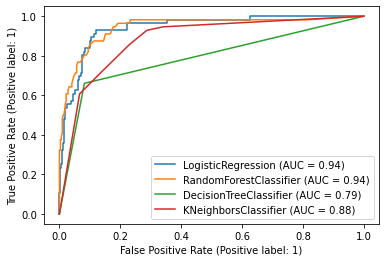

In [737]:
from sklearn.metrics import roc_auc_score,plot_roc_curve
display=plot_roc_curve(log_reg,X_test,y_test)
plot_roc_curve(rf_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(dt_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax=display.ax_)

The above roc_auc curve shows that LogisticRegression and RandomForestClassifier is having more AUC(Area Under Curve).As both are having same AUC. As we get less false prediction with RandomForestClassifier, will go ahead with RandomForest classifier as final model.

## Final Model - RandomForestClassifier

Hyper param tuning

In [761]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
param={'criterion':['gini','entropy'],'max_features':["auto", "sqrt", "log2"]}
grd_srch=GridSearchCV(RandomForestClassifier(),param_grid=param)
grd_srch.fit(X_train,y_train)
grd_srch.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='sqrt')

Training the model with best hyper params received from GridSearch

In [759]:
max_acc=0
best_Rs=0
for i in range(1,100):
    rf_clf=RandomForestClassifier(criterion='entropy',max_features='sqrt',random_state=i)
    rf_clf.fit(X_train,y_train)
    y_pred=rf_clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    if(accuracy>max_acc):
        max_acc=accuracy
        best_Rs=i
print('Best Accuracy: ',max_acc,'\n Best RS: ',best_Rs)
 

Best Accuracy:  0.9195710455764075 
 Best RS:  29


In [765]:
rf_clf=RandomForestClassifier(criterion='entropy',max_features='sqrt',random_state=29,n_estimators=70)
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
print(rf_clf,' Metrics')
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification report: \n",classification_report(y_test,y_pred))

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=70, random_state=29)  Metrics
Accuracy score:  0.9222520107238605
Confusion Matrix: 
 [[299  18]
 [ 11  45]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       317
           1       0.71      0.80      0.76        56

    accuracy                           0.92       373
   macro avg       0.84      0.87      0.86       373
weighted avg       0.93      0.92      0.92       373



Our final model able to score 92% of accuracy with 30 false predictions.

## Model Saving

In [772]:
import pickle
#Saving the final model
pickle.dump(rf_clf,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/RedWineQualityPrediction.pkl','wb'))
#loading the model
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models- Practice Projects/RedWineQualityPrediction.pkl','rb'))
y_pred=final_model.predict(X_test)
final_result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
final_result[20:40]

,Actual,Predicted
822,0,0
537,0,0
660,0,0
950,1,1
1354,0,0
1048,0,0
943,1,0
1166,0,0
471,0,0
202,0,0


Dataloss calculation

In [695]:
#Data loss using VIF
data_loss=((1599-1252)/1599)*100
data_loss

21.701063164477798

We are losing 21% of data when we use VIF. Hence we did not used VIF in this model.

In [706]:
#Data loss using Zscore
data_loss=((1599-1491)/1599)*100
data_loss

6.75422138836773

When using Zscore we are losing 6.7% of data.